In [1]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

C:\Users\km_mz\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


> 이 코드는 threshold를 구할 때 필요한 csv file을 생성한다

- csv file에는 같은 사람 3000 pairs, 다른 사람 3000pairs에 대하여 facenet을 이용해 구한 거리 값을 저장
- 결과물(outputs)
    - 동양인 csv file = `pair_with_dist_Asian.csv`
    - 서양인 csv file = `pair_with_dist_lfw.csv`

---
# 2. 서양인 데이터 
- lfw (funneld)
- 같은 사람 3000 pairs, 다른 사람 3000 pairs 

### Data set

In [3]:
%%time
import os
data_path = './lfw_prewhiten/'
ids = os.listdir(data_path)

idendities = {}
for id in ids:
    idendities[id] = os.listdir(data_path + id)

Wall time: 601 ms


### Positive samples
Find different photos of same people


In [4]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            # print(key + '/' + values[i] + " and " + key + '/' + values[j])
            positive = []
            positive.append(key + '/' + values[i])
            positive.append(key + '/' + values[j])
            positives.append(positive)

In [5]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [6]:
positives

,file_x,file_y,decision
0,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,Yes
1,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0003.jpg,Yes
2,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0004.jpg,Yes
3,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,Aaron_Peirsol/Aaron_Peirsol_0003.jpg,Yes
4,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,Aaron_Peirsol/Aaron_Peirsol_0004.jpg,Yes
...,...,...,...
242252,Zoran_Djindjic/Zoran_Djindjic_0001.jpg,Zoran_Djindjic/Zoran_Djindjic_0003.jpg,Yes
242253,Zoran_Djindjic/Zoran_Djindjic_0001.jpg,Zoran_Djindjic/Zoran_Djindjic_0004.jpg,Yes
242254,Zoran_Djindjic/Zoran_Djindjic_0002.jpg,Zoran_Djindjic/Zoran_Djindjic_0003.jpg,Yes
242255,Zoran_Djindjic/Zoran_Djindjic_0002.jpg,Zoran_Djindjic/Zoran_Djindjic_0004.jpg,Yes


### Negative samples
Compare photos of different people

In [7]:
samples_list = list(idendities.values())

In [10]:
%%time
negatives = []
ids_keys_list = list(idendities.keys())
for i in range(0, len(idendities) - 1):

    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)

        for cross_sample in cross_product:
            # print(ids_keys_list[i] + '/' + cross_sample[0] + " vs " + ids_keys_list[j] + '/' + cross_sample[1])
            negative = []
            negative.append(ids_keys_list[i] + '/' + cross_sample[0])
            negative.append(ids_keys_list[j] + '/' + cross_sample[1])
            negatives.append(negative)
            del negative
        del cross_product
    
    if len(negatives) > 242257:
        break

Wall time: 435 ms


In [13]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [14]:
negatives.head()

,file_x,file_y,decision
0,Aaron_Eckhart/Aaron_Eckhart_0001.jpg,Aaron_Guiel/Aaron_Guiel_0001.jpg,No
1,Aaron_Eckhart/Aaron_Eckhart_0001.jpg,Aaron_Patterson/Aaron_Patterson_0001.jpg,No
2,Aaron_Eckhart/Aaron_Eckhart_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0001.jpg,No
3,Aaron_Eckhart/Aaron_Eckhart_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0002.jpg,No
4,Aaron_Eckhart/Aaron_Eckhart_0001.jpg,Aaron_Peirsol/Aaron_Peirsol_0003.jpg,No


### Merge Positives and Negative Samples

In [15]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [16]:
df.shape

(519905, 3)

In [17]:
df.decision.value_counts()

No     277648
Yes    242257
Name: decision, dtype: int64

In [18]:
df.file_x = data_path + df.file_x
df.file_y = data_path + df.file_y

In [19]:
df.iloc[0, 0]

'./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_0001.jpg'

In [20]:
df

,file_x,file_y,decision
0,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,Yes
1,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,Yes
2,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,Yes
3,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,Yes
4,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,Yes
...,...,...,...
519900,./lfw_prewhiten/Abdoulaye_Wade/Abdoulaye_Wade_...,./lfw_prewhiten/Zurab_Tsereteli/Zurab_Tseretel...,No
519901,./lfw_prewhiten/Abdoulaye_Wade/Abdoulaye_Wade_...,./lfw_prewhiten/Zydrunas_Ilgauskas/Zydrunas_Il...,No
519902,./lfw_prewhiten/Abdoulaye_Wade/Abdoulaye_Wade_...,./lfw_prewhiten/Zydrunas_Ilgauskas/Zydrunas_Il...,No
519903,./lfw_prewhiten/Abdoulaye_Wade/Abdoulaye_Wade_...,./lfw_prewhiten/Zydrunas_Ilgauskas/Zydrunas_Il...,No


In [21]:
# 같은 얼굴 3000개, 다른 얼굴 3000개 pair만 남기기
selected_pos_df = df[df['decision']=='Yes'].sample(n=3000)
selected_neg_df = df[df['decision']=='No'].sample(n=3000)

selected_df = pd.concat([selected_pos_df, selected_neg_df]).reset_index(drop = True)

# DeepFace

In [22]:
!pip install DeepFace
from deepface import DeepFace

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9680 sha256=a1b6309544ec81b4dd217ab62cea8529c573df23a041351a46bde133294e7994
  Stored in directory: c:\users\km_mz\appdata\local\pip\cache\wheels\e2\62\1e\926d1ebe7b1e733c78d627fd288d01b83feaf67efc06e0e4c3
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=557dd7132c0c6249dd453c6fbfc8d6b1d8a1a584d5c2b39d4e0b3d130766f3f9
  Stored in directory: c

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.1 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.


Directory  C:\Users\km_mz /.deepface created
Directory  C:\Users\km_mz /.deepface/weights created


In [23]:
instances = selected_df[["file_x", "file_y"]].values.tolist()
print(instances[:10])

[['./lfw_prewhiten/George_W_Bush/George_W_Bush_0064.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0077.jpg'], ['./lfw_prewhiten/Colin_Powell/Colin_Powell_0060.jpg', './lfw_prewhiten/Colin_Powell/Colin_Powell_0061.jpg'], ['./lfw_prewhiten/George_W_Bush/George_W_Bush_0009.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0188.jpg'], ['./lfw_prewhiten/George_W_Bush/George_W_Bush_0460.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0474.jpg'], ['./lfw_prewhiten/Saddam_Hussein/Saddam_Hussein_0011.jpg', './lfw_prewhiten/Saddam_Hussein/Saddam_Hussein_0020.jpg'], ['./lfw_prewhiten/George_W_Bush/George_W_Bush_0039.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0349.jpg'], ['./lfw_prewhiten/George_W_Bush/George_W_Bush_0050.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0138.jpg'], ['./lfw_prewhiten/George_W_Bush/George_W_Bush_0174.jpg', './lfw_prewhiten/George_W_Bush/George_W_Bush_0279.jpg'], ['./lfw_prewhiten/Lleyton_Hewitt/Lleyton_Hewitt_0013.jpg', './lfw_prewhiten/Lleyton_Hew

In [24]:
model_name = "Facenet"
distance_metric = "euclidean_l2"
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric, enforce_detection=False)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1971Xk5RwedbudGgTIrGAL4F7Aifu7id1
To: C:\Users\km_mz\.deepface\weights\facenet_weights.h5
92.2MB [00:11, 8.11MB/s]
Verification:   0%|                                                                           | 0/6000 [00:00<?, ?it/s]

Using Facenet model backend


Verification: 100%|████████████████████████████████████████████████████████████████| 6000/6000 [31:29<00:00,  3.17it/s]


In [25]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [26]:
selected_df["distance_l2"] = distances

In [27]:
# selected_df.to_csv('pair_with_dist_lfw_prewhiten.csv', index=False)

In [28]:
selected_df

,file_x,file_y,decision,distance_l2
0,./lfw_prewhiten/George_W_Bush/George_W_Bush_00...,./lfw_prewhiten/George_W_Bush/George_W_Bush_00...,Yes,0.7636
1,./lfw_prewhiten/Colin_Powell/Colin_Powell_0060...,./lfw_prewhiten/Colin_Powell/Colin_Powell_0061...,Yes,0.7167
2,./lfw_prewhiten/George_W_Bush/George_W_Bush_00...,./lfw_prewhiten/George_W_Bush/George_W_Bush_01...,Yes,0.9628
3,./lfw_prewhiten/George_W_Bush/George_W_Bush_04...,./lfw_prewhiten/George_W_Bush/George_W_Bush_04...,Yes,1.3440
4,./lfw_prewhiten/Saddam_Hussein/Saddam_Hussein_...,./lfw_prewhiten/Saddam_Hussein/Saddam_Hussein_...,Yes,1.1211
...,...,...,...,...
5995,./lfw_prewhiten/Abdoulaye_Wade/Abdoulaye_Wade_...,./lfw_prewhiten/Adrien_Brody/Adrien_Brody_0012...,No,0.7808
5996,./lfw_prewhiten/Aaron_Peirsol/Aaron_Peirsol_00...,./lfw_prewhiten/Dorothy_Loudon/Dorothy_Loudon_...,No,1.3476
5997,./lfw_prewhiten/Aaron_Guiel/Aaron_Guiel_0001.jpg,./lfw_prewhiten/Howard_Wilkinson/Howard_Wilkin...,No,1.2087
5998,./lfw_prewhiten/Abdel_Nasser_Assidi/Abdel_Nass...,./lfw_prewhiten/Tom_Hanks/Tom_Hanks_0005.jpg,No,1.2668


In [29]:
selected_df.describe()

,distance_l2
count,6000.000000
mean,1.172679
std,0.263370
min,0.320500
25%,0.949525
50%,1.260300
75%,1.388250
max,1.650700


# ROC curve

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

In [31]:
encoder = LabelEncoder()
encoder.fit(selected_df['decision'])
selected_df_label_encoded = encoder.transform(selected_df['decision']) # 1='Yes' / 0='No'
selected_df['distance_l2_scaled'] = -selected_df['distance_l2']

In [32]:
fpr, tpr, thresholds = roc_curve(selected_df_label_encoded, selected_df['distance_l2_scaled'])
roc_auc = auc(fpr, tpr)

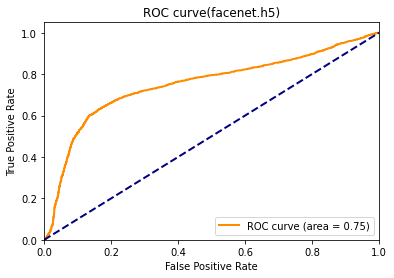

In [33]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve(facenet.h5)')
plt.legend(loc="lower right")
plt.show()